In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [68]:
def terrorist():
    global df
    df = pd.read_csv("C:/Users/T.R.BASUDE/Downloads/globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")
    return df

In [69]:
terrorist().head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#Raw data visulization
#This graph visualizes that the dataset has several NaN values (Yellow ones)

def heatmap():
    plt.figure(figsize=(16,6))
    sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
    return

MemoryError: 

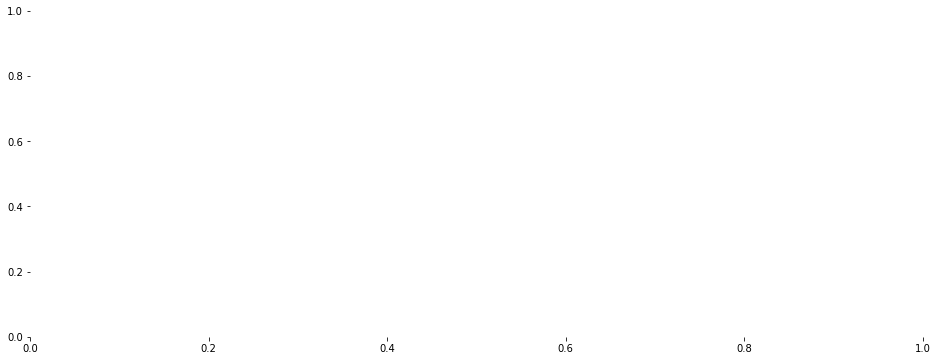

In [5]:
heatmap()

In [6]:
#Attacks in few countries since 1970

def countries():
    fig = plt.figure(figsize=(15,10))
    countries = df[['country_txt']].drop_duplicates()
    countries.values.tolist()
    countries = [country for country_list in countries.values.tolist() for country in country_list]
    for country in countries[:30]:
        country_data = df.loc[df['country_txt']==country]
        country_data.groupby('iyear').success.sum().plot(label=country)
    plt.legend(loc='best')
    plt.show()
    return

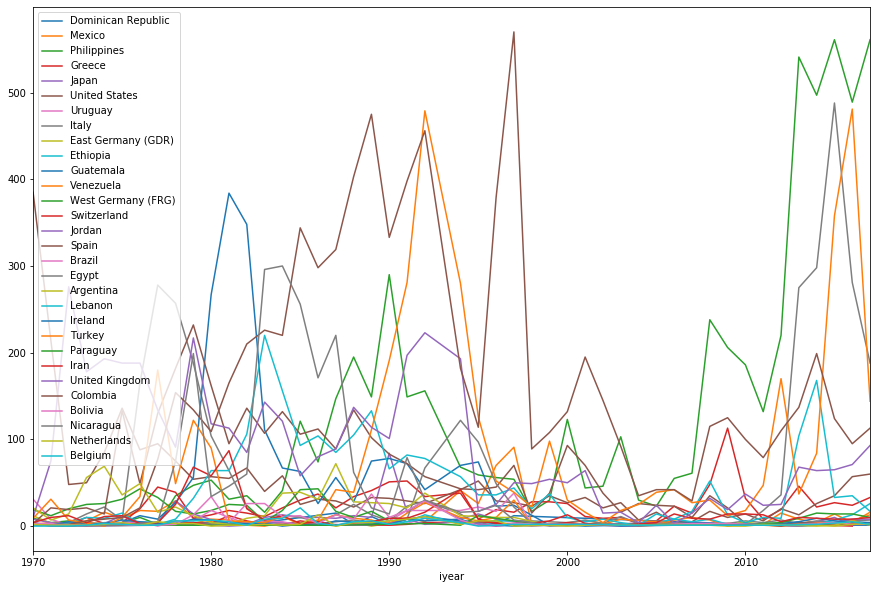

In [7]:
countries()

In [8]:
#Top 10 countries who face the most terrorist atack since 1970

def countries():
    total_attacks_in_each_country = df.groupby('country_txt').count()
    countries_who_faced_max_attacks =  total_attacks_in_each_country.sort_values('success', ascending=False)[:10].index
    countries_who_faced_max_attacks.values.tolist()
    print("Countries who faced most terrorist attacks since 1970 are: ")
    for country in countries_who_faced_max_attacks:
        print(f"{country}") 
    return

In [9]:
countries()

Countries who faced most terrorist attacks since 1970 are: 
Iraq
Pakistan
Afghanistan
India
Colombia
Philippines
Peru
El Salvador
United Kingdom
Turkey


In [10]:
#Number of terrorist attack per year

def plot():
    fig = plt.figure(figsize=(15,10))
    x = df['iyear'].unique()
    y = df.groupby('iyear').count()['country_txt']
    plt.plot(x, y)
    plt.xlabel('Year')
    plt.ylabel('Number of Attacks')
    plt.title('Number of Terrorist Activities Per Year')
    plt.xticks(x, x, rotation='90') # x, label, rotation
    plt.show()
    return

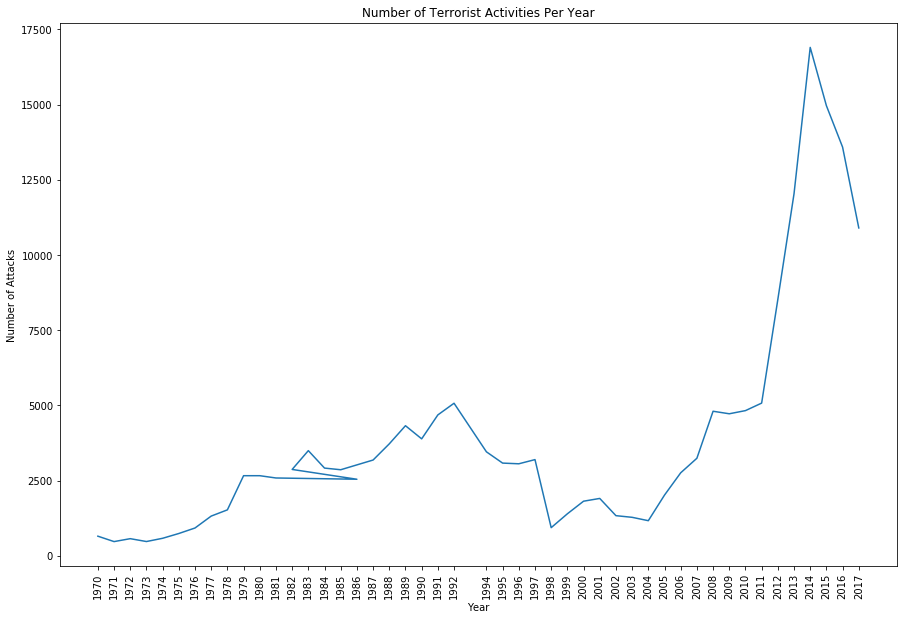

In [11]:
plot()

In [12]:
#Cleaning the Dataset

df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
                       ...   
propextent            float64
propextent_txt         object
propvalue 

In [13]:
def value_counts():
    null = df.isna().sum()
    return null

In [14]:
value_counts()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

In [15]:
# To remove all columns having null values > 5000

for i in df.columns:
    if df[i].isnull().sum()>5000:
        df.drop(columns=i, inplace=True)

In [16]:
df.shape

(181691, 41)

In [17]:
# further reduction of unnecessary columns after looking at the Codebook (documentation)

df.drop(columns=['eventid', 'extended', 'country_txt', 'region_txt', 'specificity', 'vicinity',
                 'crit1', 'crit2', 'crit3', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt',
                 'guncertain1', 'individual', 'weaptype1_txt', 'dbsource', 'INT_MISC'], inplace=True)

In [18]:
df.shape

(181691, 24)

In [19]:
# Numerical data Distribution

def histogram():
    df.hist(figsize=[10,10]);
    return

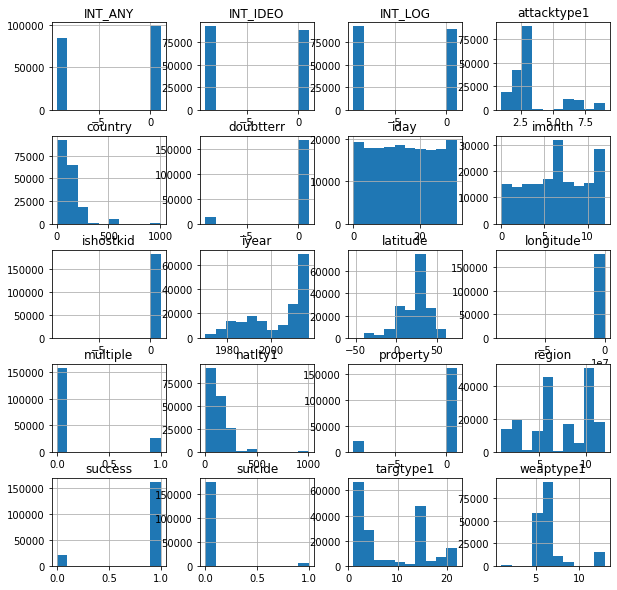

In [20]:
histogram()

In [21]:
# Percentage of Null Values

def value_counts():
    null = df.isna().mean().round(4) * 100
    return null

In [22]:
value_counts()

iyear          0.00
imonth         0.00
iday           0.00
country        0.00
region         0.00
provstate      0.23
city           0.24
latitude       2.51
longitude      2.51
doubtterr      0.00
multiple       0.00
success        0.00
suicide        0.00
attacktype1    0.00
targtype1      0.00
target1        0.35
natlty1        0.86
gname          0.00
weaptype1      0.00
property       0.00
ishostkid      0.10
INT_LOG        0.00
INT_IDEO       0.00
INT_ANY        0.00
dtype: float64

In [23]:
# replacing nan values (refer Codebook.pdf)

df['doubtterr'].fillna(-9, inplace=True)
df['multiple'].fillna(0, inplace=True)
df['natlty1'].fillna(0, inplace=True)
df['ishostkid'].fillna(-9, inplace=True)
df['latitude'].fillna(0, inplace=True)
df['longitude'].fillna(0, inplace=True)

# quantizing dataset
df['provstate'] = pd.factorize(df['provstate'])[0]
df['iyear'] = pd.factorize(df['iyear'])[0]
df['city'] = pd.factorize(df['city'])[0]
df['country'] = pd.factorize(df['country'])[0]
df['target1'] = pd.factorize(df['target1'])[0]
df['gname'] = pd.factorize(df['gname'])[0]
df['natlty1'] = pd.factorize(df['natlty1'])[0]

In [24]:
def value_counts():
    null = df.isna().any()
    return null

In [25]:
value_counts()

iyear          False
imonth         False
iday           False
country        False
region         False
provstate      False
city           False
latitude       False
longitude      False
doubtterr      False
multiple       False
success        False
suicide        False
attacktype1    False
targtype1      False
target1        False
natlty1        False
gname          False
weaptype1      False
property       False
ishostkid      False
INT_LOG        False
INT_IDEO       False
INT_ANY        False
dtype: bool

In [26]:
#Correlation
def heatmap():
    sns.heatmap(df.corr(), annot=True);
    return

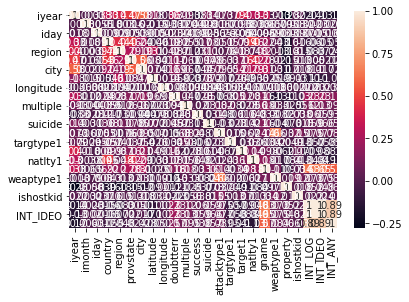

In [27]:
heatmap()

In [28]:
#heatmap

def heatmap():
    plt.figure(figsize=(16,6))
    sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
    return

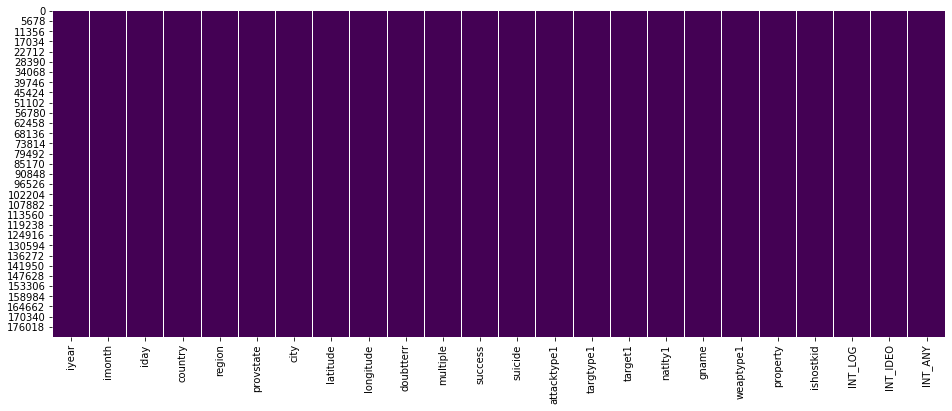

In [29]:
heatmap()

In [30]:
# saving file for future use

df.to_csv('terrorist_data_pruned.csv', index=False)

In [31]:
def terrorist():
    global df
    df = pd.read_csv('terrorist_data_pruned.csv')
    return df

In [32]:
terrorist().head()

,iyear,imonth,iday,country,region,provstate,city,latitude,longitude,doubtterr,...,targtype1,target1,natlty1,gname,weaptype1,property,ishostkid,INT_LOG,INT_IDEO,INT_ANY
0,0,7,2,0,2,-1,0,18.456792,-69.951164,0.0,...,14,0,0,0,13,0,0.0,0,0,0
1,0,0,0,1,1,0,1,19.371887,-99.086624,0.0,...,7,1,1,1,13,0,1.0,0,1,1
2,0,1,0,2,5,1,2,15.478598,120.599741,0.0,...,10,2,2,2,13,0,0.0,-9,-9,1
3,0,1,0,3,8,2,3,37.997490,23.762728,0.0,...,7,3,2,2,6,1,0.0,-9,-9,1
4,0,1,0,4,4,3,4,33.580412,130.396361,-9.0,...,7,4,2,2,8,1,0.0,-9,-9,1


In [33]:
# checking frequency of column values

def bar():
    plt.figure(figsize=(17,10))
    i = 0
    for col in df.columns:
        if col=='latitude' or col=='longitude' or col=='city' or col=='provstate' or col=='target1' or col=='gname':
            continue
        i += 1
        plt.subplot(6, 3, i)
        num_list = df[col].value_counts()
        plt.bar(num_list.index, num_list.values)
        plt.title(col)
    plt.tight_layout()   
    plt.show()
    return

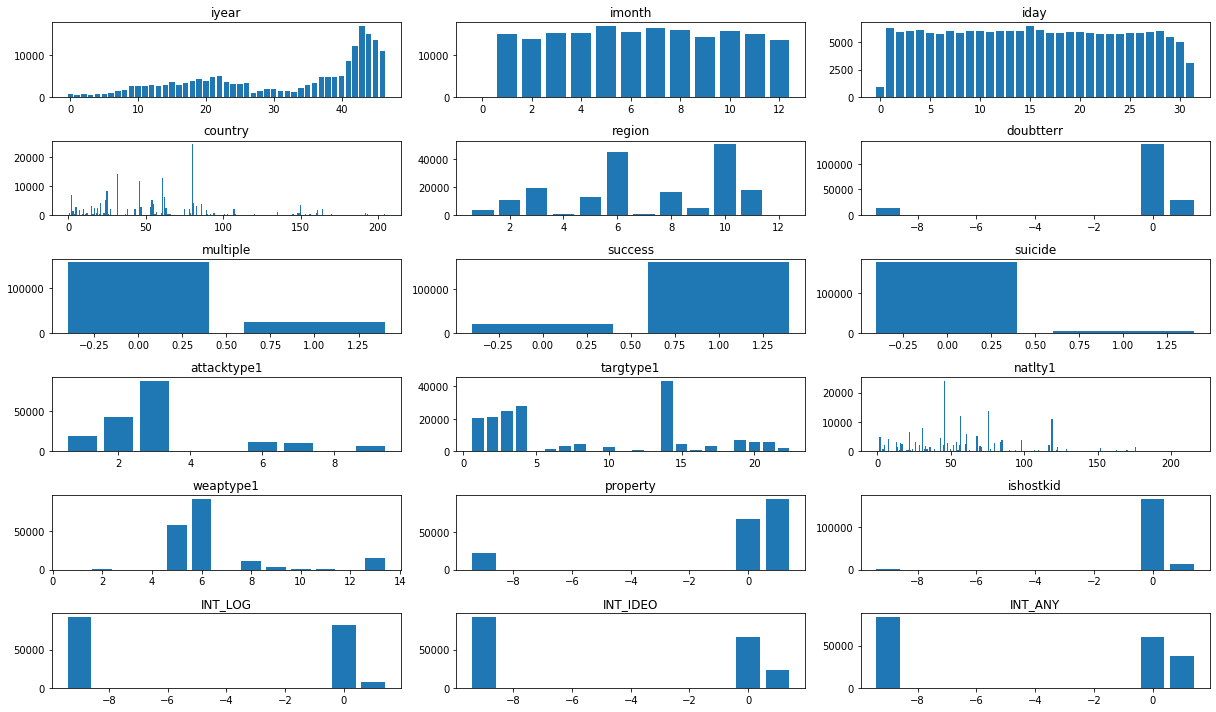

In [34]:
bar()

In [35]:
# classes having less than 600 samples were dropped from the dataframe to remove skewedness in data

num = df['gname'].value_counts()
res = num.where(num>600).dropna()
res

2       82782.0
2001     7478.0
3024     5613.0
455      4555.0
478      3351.0
2699     3288.0
15       2772.0
46       2671.0
203      2487.0
2819     2418.0
1057     2310.0
78       2024.0
2589     1878.0
631      1630.0
221      1606.0
123      1561.0
2695     1351.0
36       1125.0
2632     1062.0
2549     1020.0
948       895.0
1019      830.0
863       716.0
157       639.0
2526      638.0
598       632.0
3136      624.0
281       607.0
Name: gname, dtype: float64

In [36]:
k = []
c = 0
for index, row in df.iterrows():
    if row['gname'] not in list(res.index):
        k.append(index)
    if row['gname']==2:
        c += 1
        if c>5000:
            k.append(index)

In [37]:
df.drop(index=k, inplace=True)

In [38]:
df.shape

(60781, 24)

In [39]:
# converts labels to one-hot encoding

y = pd.get_dummies(df['gname']).values

In [40]:
# normalizing feature values
from sklearn.preprocessing import MinMaxScaler
x = df.drop(columns='gname')
x = x.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

In [41]:
x_scaled.shape

(60781, 23)

In [42]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.083333,0.000000,0.010,0.363636,0.000708,0.000082,0.572701,0.824064,0.9,...,0.000,0.428571,0.000035,0.009302,1.000000,0.9,0.9,0.0,0.0,1.0
1,0.0,0.083333,0.000000,0.015,0.636364,0.001062,0.000109,0.782926,0.496657,0.9,...,0.250,0.285714,0.000047,0.009302,0.363636,1.0,0.9,0.0,0.0,1.0
2,0.0,0.083333,0.000000,0.020,0.272727,0.001416,0.000136,0.741690,0.857187,0.0,...,0.750,0.285714,0.000058,0.009302,0.545455,1.0,0.9,0.0,0.0,1.0
3,0.0,0.083333,0.064516,0.025,0.000000,0.002478,0.000218,0.781007,0.003068,1.0,...,0.250,0.952381,0.000093,0.009302,0.363636,1.0,0.9,0.0,0.0,0.0
4,0.0,0.083333,0.258065,0.035,0.636364,0.003540,0.000327,0.819274,0.458544,0.0,...,0.375,0.238095,0.000151,0.009302,0.272727,0.9,0.9,0.0,0.0,1.0


In [43]:
# saving file for future use

np.save('x_normed.npy', x_scaled)
np.save('y.npy', y)

In [44]:
#Classification

x = np.load('x_normed.npy')
y = np.load('y.npy')

In [45]:
x

array([[0.        , 0.08333333, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.08333333, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.08333333, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.9       , 0.9       ,
        0.9       ],
       [1.        , 1.        , 1.        , ..., 0.9       , 0.9       ,
        0.9       ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [46]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(54702, 23) (54702, 28) (6079, 23) (6079, 28)


In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [60]:
def SVM():
    global acc1
    global pred1
    model1 = svm.SVC(C=6, kernel='rbf')
    model1.fit(x_train, np.argmax(y_train, axis=1))
    pred1 = model1.predict(x_test)
    acc1 = np.mean(pred1==np.argmax(y_test, axis=1))*100
    print('accuracy', pred1)    
    return

In [61]:
SVM()

accuracy [17 18 25 ... 22 27  0]


In [62]:
def DTC():
    global acc2
    global pred2
    model2 = DecisionTreeClassifier()
    model2.fit(x_train, np.argmax(y_train, axis=1))
    pred2 = model2.predict(x_test)
    acc2 = np.mean(pred2==np.argmax(y_test, axis=1))*100
    print('accuracy', pred2)    
    return

In [63]:
DTC()

accuracy [17 18 25 ... 22 27  0]


In [64]:
print('Accuracy SVC:{:.2f}%'.format(acc1))

Accuracy SVC:96.55%


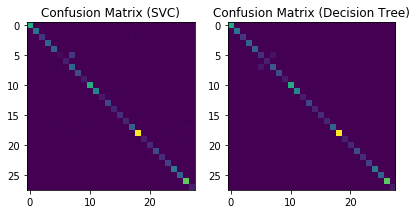

In [65]:

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(np.argmax(y_test, axis=1), pred1)
cm2 = confusion_matrix(np.argmax(y_test, axis=1), pred2)

plt.subplot(1, 2, 1)
plt.imshow(cm1)
plt.title('Confusion Matrix (SVC)')

plt.subplot(1, 2, 2)
plt.imshow(cm2)
plt.title('Confusion Matrix (Decision Tree)')

plt.tight_layout()
plt.show()

In [66]:
print('Accuracy SVC: {:.2f}%\nAccuracy Desicion Tree: {:.2f}%'.format(acc1, acc2))

Accuracy SVC: 96.55%
Accuracy Desicion Tree: 98.31%


In [67]:
print('Accuracy SVC:{:.2f}%'.format(acc1))

Accuracy SVC:96.55%
